In [3]:
# Imports 
from tensorflow.keras.layers import Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.models import Sequential
import tensorflow.keras as tf 
import matplotlib.pyplot as plt 
import numpy as np
import cv2 
import os 
import tensorflow as tf1 
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imsave
from skimage.transform import resize
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [4]:
path = '/content/drive/MyDrive/parks'

import os 
import cv2 

x = [ ]
SIZE = 256

# Going through all of the images in that particular folder 

for image in os.scandir(path) :
  image = image.path
  if image is not None :
    img = cv2.imread(image)
    if img is not None :
      img = cv2.resize(img,(SIZE, SIZE))
      x.append(img)


In [5]:
X =[]
Y =[]
for img in x:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128) #A and B values range from -127 to 128, 
      #so we divide the values by 128 to restrict values to between -1 and 1.
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) #dimensions to be the same for X and Y
print(X.shape)
print(Y.shape)


(91, 256, 256, 1)
(91, 256, 256, 2)


In [6]:
np.array(x).shape

(91, 256, 256, 3)

In [7]:
# X has a channel of 1, bcoz it is black and white channel (L), y has a channel of 2, bcoz it has a AB colored channel

In [8]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#Decoder
#Decoder
#Note: For the last layer we use tanh instead of Relu. 
#This is because we are colorizing the image in this layer using 2 filters, A and B.
#A and B values range between -1 and 1 so tanh (or hyperbolic tangent) is used
#as it also has the range between -1 and 1. 
#Other functions go from 0 to 1.
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()


model.fit(X,Y,validation_split=0.1, epochs=200, batch_size=16)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 512)       2

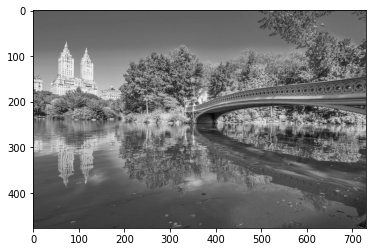

In [15]:
import cv2 
import matplotlib.pyplot as plt 
path = '/content/drive/MyDrive/parks/16 Best Parks in New York City _ PlanetWare.jpg'
image = cv2.imread(path)
plt.imshow(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_img = cv2.resize(gray, (256, 256))
plt.imshow(gray, cmap = 'gray')
plt.show()

In [16]:
grayscale_img = np.reshape(gray_img, (256,256, 1))

In [17]:
img1_color=[]
img1=img_to_array(load_img(path))
img1 = resize(img1 ,(256,256))
img1_color.append(img1)
img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))
output1 = model.predict(img1_color)
output1 = output1*128
result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
imsave("result.png", lab2rgb(result))

/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 48161 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
